In [129]:
from shapely.geometry import Polygon,Point
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                               Polygon([(2,2), (4,2), (4,4), (2,4)])])
 

polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                               Polygon([(3,3), (5,3), (5,5), (3,5)])])
 

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

<function matplotlib.pyplot.show(*args, **kw)>

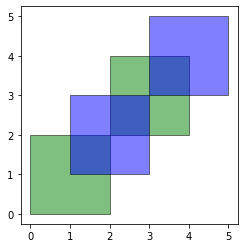

In [130]:
fig, ax=plt.subplots()
polys1.plot(ax=ax,color="green",edgecolor="black", alpha=0.5)
polys2.plot(ax=ax,color="blue",edgecolor="black", alpha=0.5)

plt.show

#res_union = gpd.overlay(df1, df2, how='intersection')

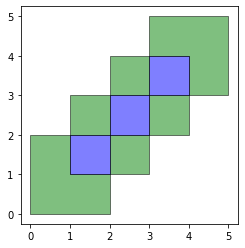

In [131]:
res_union = gpd.overlay(df1, df2, how='symmetric_difference')
res_union2 = gpd.overlay(df1, df2, how='intersection')


fig, ax =plt.subplots()
res_union.plot(ax=ax,color="green", edgecolor="black", alpha=0.5)
res_union2.plot(ax=ax,color="blue", edgecolor="black", alpha=0.5)

In [132]:
res_union_3=gpd.overlay(res_union,res_union2,how='union')


In [133]:
res_union_3["geometry"]

0    POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....
1    MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...
2    MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000...
3    POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5....
4    POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....
5    POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3....
6    POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4....
Name: geometry, dtype: geometry

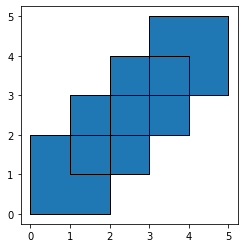

In [134]:
res_union_5 = gpd.overlay(df1, df2, how='union')
res_union_5.plot(edgecolor="black")

In [135]:
res_union_5

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."
3,1.0,NaN,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1...."
4,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
5,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
6,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


In [136]:
gpd.sjoin(df1,df2,how="left", op="intersects")


,geometry,df1,index_right,df2
0,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",1,0,1
1,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",2,0,1
1,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",2,1,2


<function matplotlib.pyplot.show(*args, **kw)>

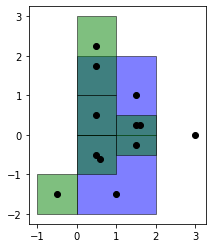

In [160]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]), #top country
                        Polygon([(0,0), (0,-2), (2,-2), (2,0)])]) #bottom country
#polys1.plot(edgecolor="black", alpha=0.5) 



polys2 = gpd.GeoSeries([Polygon([(0,0), (0,1), (1,1), (1,0)]), # Grid A (top country only)
                       Polygon([(0,0), (0,-1), (1,-1), (1,0)]), # Grid B (bottom country only)
                       Polygon([(1,-0.5), (1,0.5), (2,0.5), (2,-0.5)]), # Grid C (half in top country half in bottom)
                       Polygon([(0,-1), (-1,-1), (-1,-2), (0,-2)]), # Grid D (Fully outside both countrys)
                       Polygon([(0,1), (0,3), (1,3), (1,1)])]) # Grid E (half in top country half outside)


points= gpd.GeoSeries([Point([(0.5,0.5)]), # In Grid A 
                      Point([(0.5,-0.5)]), # In Grid B
                      Point([(0.6,-0.6)]), # In Grid B
                      Point([(1.5,0.25)]), # In Grid C top country
                      Point([(1.6,0.26)]), # In Grid C top country
                      Point([(1.5,-0.25)]), # In Grid C bottom country
                      Point([(1.5,1)]), # No grid but in top country
                      Point([(0.5,1.75)]), # Grid E top country
                      Point([(0.5,2.25)]), # Grid E outside of both countries
                      Point([(1,-1.5)]), # No grid but in bottom country
                      Point([(-0.5,-1.5)]), # Grid D
                      Point([(3,0)])]) # Comletely outside
                


countries_df = gpd.GeoDataFrame({'geometry': polys1, 'country':["TOP_CONTAINER", "BOTTOM_CONTAINER"]})
grid_df = gpd.GeoDataFrame({'geometry': polys2, 'grid':["Grid_A: ALL_IN_TOP","Grid_B: ALL_IN_BOTTOM","Grid C: HALF_TOP_HALF_BOTTOM","Grid D: FULLY_OUTSIDE","Grid E: HALF_IN_TOP_HALF_OUTSIDE"]})
points_df = gpd.GeoDataFrame({'geometry': points, 'point':["Grid_A", "Grid_B","Grid_B_second_point", "Grid C: Top","Grid C: Top second", "Grid C Bottom","No grid top", "Grid E top", "Grid E no country", "No grid bottom country", "Grid D no country", "No country no grid"]})

#polys2.plot(edgecolor="black", alpha=0.5) 

fig, ax= plt.subplots()

countries_df.plot(edgecolor="black", color="blue", ax=ax, alpha=0.5)
grid_df.plot(edgecolor="black", color="green", ax=ax, alpha=0.5)
points_df.plot(color="black", ax=ax)

plt.show

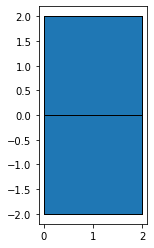

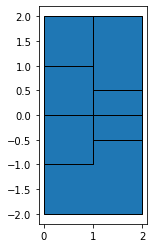

In [161]:
import pandas as pd
grid_overlay=gpd.overlay(countries_df,grid_df, "identity")
grid_overlay=pd.merge(grid_overlay, countries_df, how="left",on="country", suffixes=["_grid","_country"])

grid_overlay.set_geometry("geometry_country").plot(edgecolor="black")
grid_overlay.set_geometry("geometry_grid").plot(edgecolor="black")

#grid_overlay

In [163]:
#grid_overlay.set_geometry("geometry_grid")

#grid_overlay.columns=["geometry" if column_names=="geometry_grid" else column_names for column_names in grid_overlay.columns]
points_overlay=gpd.sjoin(grid_overlay.set_geometry("geometry_grid"),points_df,op="contains")
points_df=pd.merge(points_overlay, points_df, how="left",on="point", suffixes=["_grid","_point"])

                    
#grid_overlay.set_geometry("geometry_grid")

#grid_overlay=pd.merge(grid_overlay, points_df, how="left",on="point", suffixes=["_grid","_point"])


In [164]:
points_df

,country,grid,geometry_grid,geometry_country,index_right,point,geometry
0,TOP_CONTAINER,Grid_A: ALL_IN_TOP,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....","POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",0,Grid_A,POINT (0.50000 0.50000)
1,TOP_CONTAINER,Grid E: HALF_IN_TOP_HALF_OUTSIDE,"POLYGON ((0.00000 1.00000, 0.00000 2.00000, 1....","POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",7,Grid E top,POINT (0.50000 1.75000)
2,TOP_CONTAINER,Grid C: HALF_TOP_HALF_BOTTOM,"POLYGON ((2.00000 0.50000, 2.00000 0.00000, 1....","POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",3,Grid C: Top,POINT (1.50000 0.25000)
3,TOP_CONTAINER,Grid C: HALF_TOP_HALF_BOTTOM,"POLYGON ((2.00000 0.50000, 2.00000 0.00000, 1....","POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",4,Grid C: Top second,POINT (1.60000 0.26000)
4,BOTTOM_CONTAINER,Grid C: HALF_TOP_HALF_BOTTOM,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....","POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 2...",5,Grid C Bottom,POINT (1.50000 -0.25000)
5,BOTTOM_CONTAINER,Grid_B: ALL_IN_BOTTOM,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....","POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 2...",1,Grid_B,POINT (0.50000 -0.50000)
6,BOTTOM_CONTAINER,Grid_B: ALL_IN_BOTTOM,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....","POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 2...",2,Grid_B_second_point,POINT (0.60000 -0.60000)
7,TOP_CONTAINER,NaN,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....","POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",6,No grid top,POINT (1.50000 1.00000)
8,BOTTOM_CONTAINER,NaN,"POLYGON ((2.00000 -0.50000, 2.00000 -2.00000, ...","POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 2...",9,No grid bottom country,POINT (1.00000 -1.50000)


In [176]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]), #top country
                        Polygon([(0,0), (0,-2), (2,-2), (2,0)])]) #bottom country
#polys1.plot(edgecolor="black", alpha=0.5) 



polys2 = gpd.GeoSeries([Polygon([(0,0), (0,1), (1,1), (1,0)]), # Grid A (top country only)
                       Polygon([(0,0), (0,-1), (1,-1), (1,0)]), # Grid B (bottom country only)
                       Polygon([(1,-0.5), (1,0.5), (2,0.5), (2,-0.5)]), # Grid C (half in top country half in bottom)
                       Polygon([(0,-1), (-1,-1), (-1,-2), (0,-2)]), # Grid D (Fully outside both countrys)
                       Polygon([(0,1), (0,3), (1,3), (1,1)])]) # Grid E (half in top country half outside)


points= gpd.GeoSeries([Point([(0.5,0.5)]), # In Grid A 
                      Point([(0.5,-0.5)]), # In Grid B
                      Point([(0.6,-0.6)]), # In Grid B
                      Point([(1.5,0.25)]), # In Grid C top country
                      Point([(1.6,0.26)]), # In Grid C top country
                      Point([(1.5,-0.25)]), # In Grid C bottom country
                      Point([(1.5,1)]), # No grid but in top country
                      Point([(0.5,1.75)]), # Grid E top country
                      Point([(0.5,2.25)]), # Grid E outside of both countries
                      Point([(1,-1.5)]), # No grid but in bottom country
                      Point([(-0.5,-1.5)]), # Grid D
                      Point([(3,0)])]) # Comletely outside
                


countries_df = gpd.GeoDataFrame({'geometry': polys1, 'country':["TOP_CONTAINER", "BOTTOM_CONTAINER"]})
grid_df = gpd.GeoDataFrame({'geometry': polys2, 'grid':["Grid_A: ALL_IN_TOP","Grid_B: ALL_IN_BOTTOM","Grid C: HALF_TOP_HALF_BOTTOM","Grid D: FULLY_OUTSIDE","Grid E: HALF_IN_TOP_HALF_OUTSIDE"]})
points_df = gpd.GeoDataFrame({'geometry': points, 'point':["Grid_A", "Grid_B","Grid_B_second_point", "Grid C: Top","Grid C: Top second", "Grid C Bottom","No grid top", "Grid E top", "Grid E no country", "No grid bottom country", "Grid D no country", "No country no grid"]})

#polys2.plot(edgecolor="black", alpha=0.5) 





def nesting_points_within_grids_within_countries(point_dataframe,point_ID,grid_dataframe,grid_ID,world_dataframe,country_ID):
    
    grid_overlay=gpd.overlay(countries_df,grid_df, "identity")
    grid_overlay=pd.merge(grid_overlay, countries_df, how="left",on=country_ID, suffixes=["_grid","_country"])

    
    #grid_overlay.set_geometry("geometry_country").plot(edgecolor="black")
    #grid_overlay.set_geometry("geometry_grid").plot(edgecolor="black")
        
    points_overlay=gpd.sjoin(grid_overlay.set_geometry("geometry_grid"),points_df,op="contains")
    points_within_grid_within_country=pd.merge(points_overlay, points_df, how="left",on=point_ID, suffixes=["_grid","_point"])
    points_within_grid_within_country.columns=["geometry_point" if column_names=="geometry" else column_names for column_names in points_within_grid_within_country.columns]
    return points_within_grid_within_country;



points_within_grids_within_countries=nesting_points_within_grids_within_countries(point_dataframe=points_df,
                                             point_ID="point",
                                             grid_dataframe=grid_df,
                                             grid_ID="grid",
                                             world_dataframe=countries_df,
                                             country_ID="country")


<function matplotlib.pyplot.show(*args, **kw)>

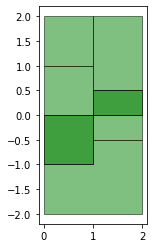

In [182]:
fig, ax= plt.subplots()

#points_within_grids_within_countries.set_geometry("geometry_country").plot(edgecolor="black", color="blue", ax=ax, alpha=0.5)
points_within_grids_within_countries.set_geometry("geometry_grid").plot(edgecolor="black", color="green", ax=ax, alpha=0.5)
#points_within_grids_within_countries.set_geometry("geometry_point").plot(color="black", ax=ax)
plt.show